(9/26)  HW_1 部分

           日期        成交股數            成交金額    開盤價    最高價    最低價    收盤價    漲跌價差  \
0  2024-09-02  19,272,593  18,270,058,260  950.0  955.0  943.0  948.0   +4.00   
1  2024-09-03  23,205,623  21,908,471,541  948.0  952.0  939.0  940.0   -8.00   
2  2024-09-04  93,169,835  83,424,133,824  894.0  905.0  888.0  889.0  -51.00   
3  2024-09-05  34,147,890  30,998,595,394  907.0  915.0  900.0  902.0  +13.00   
4  2024-09-06  28,248,063  25,786,016,936  909.0  918.0  903.0  918.0  +16.00   
5  2024-09-09  38,448,946  34,456,838,126  892.0  900.0  891.0  899.0  -19.00   
6  2024-09-10  34,312,646  31,067,424,234  907.0  911.0  901.0  904.0   +5.00   
7  2024-09-11  19,513,256  17,621,000,956  906.0  906.0  900.0  901.0   -3.00   
8  2024-09-12  43,749,260  40,999,951,508  936.0  944.0  928.0  940.0   X0.00   
9  2024-09-13  28,307,441  26,795,862,243  955.0  955.0  939.0  947.0   +7.00   
10 2024-09-16  14,456,888  13,692,259,575  952.0  952.0  943.0  947.0    0.00   
11 2024-09-18  30,094,662  2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


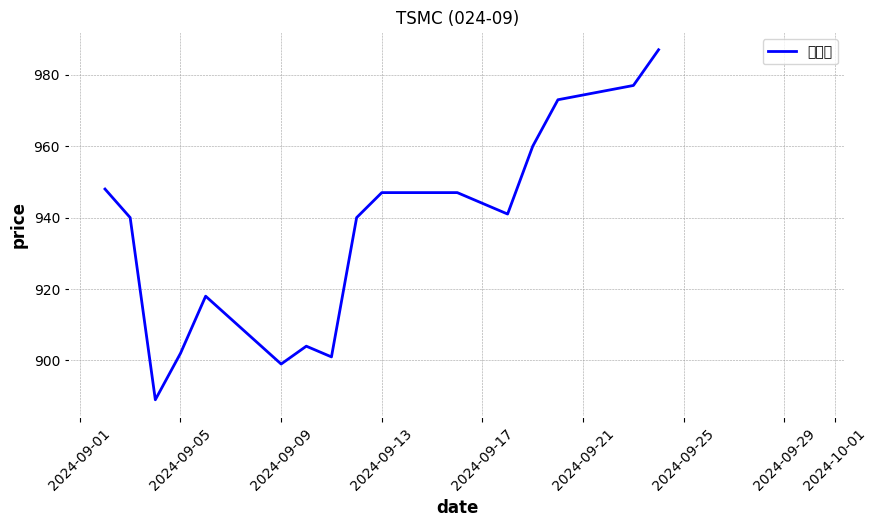

In [18]:
from pickle import encode_long
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國日期轉換為西元日期
def convert_roc_to_ad(roc_date: str) -> str:
    # 假設日期格式為 "112/08/01" -> "2023/08/01"
    roc_year, month, day = roc_date.split('/')
    ad_year = str(int(roc_year) + 1911)  # 民國年 + 1911 = 西元年
    return f'{ad_year}/{month}/{day}'

# 從台灣證券交易所抓取資料
def get_twse_data(date: str, stock_no: str):
    url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}'
    response = requests.get(url)
    data = response.json()

    # 將抓取的資料轉換為 DataFrame
    df = pd.DataFrame(data['data'], columns=['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'])

    # 將民國日期轉換為西元日期，並轉換為 datetime 格式
    df['日期'] = pd.to_datetime(df['日期'].apply(convert_roc_to_ad))

    # 把數字型欄位轉換為浮點數
    df['開盤價'] = pd.to_numeric(df['開盤價'], errors='coerce')
    df['最高價'] = pd.to_numeric(df['最高價'], errors='coerce')
    df['最低價'] = pd.to_numeric(df['最低價'], errors='coerce')
    df['收盤價'] = pd.to_numeric(df['收盤價'], errors='coerce')

    return df

# 抓取股票的股價數據(日期,股票代號)
df_twse = get_twse_data('202409024', '2330')

# 顯示 DataFrame 資料
print(df_twse)

# 繪製收盤價折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_twse['日期'], df_twse['收盤價'], label='收盤價', color='blue')
plt.title('TSMC (024-09)')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [19]:
!pip install yfinance

                                  Open         High          Low        Close  \
Date                                                                            
2024-09-02 00:00:00+08:00   945.782442   950.760244   938.813518   943.791321   
2024-09-03 00:00:00+08:00   943.791327   947.773569   934.831283   935.826843   
2024-09-04 00:00:00+08:00   890.031086   900.982252   884.057723   885.053284   
2024-09-05 00:00:00+08:00   902.973347   910.937831   896.004423   897.995544   
2024-09-06 00:00:00+08:00   904.964455   913.924500   898.991093   913.924500   
2024-09-09 00:00:00+08:00   888.039927   896.004411   887.044366   895.008850   
2024-09-10 00:00:00+08:00   902.973315   906.955556   896.999952   899.986633   
2024-09-11 00:00:00+08:00   901.977802   901.977802   896.004440   897.000000   
2024-09-12 00:00:00+08:00   936.000000   944.000000   928.000000   940.000000   
2024-09-13 00:00:00+08:00   955.000000   955.000000   939.000000   947.000000   
2024-09-16 00:00:00+08:00   

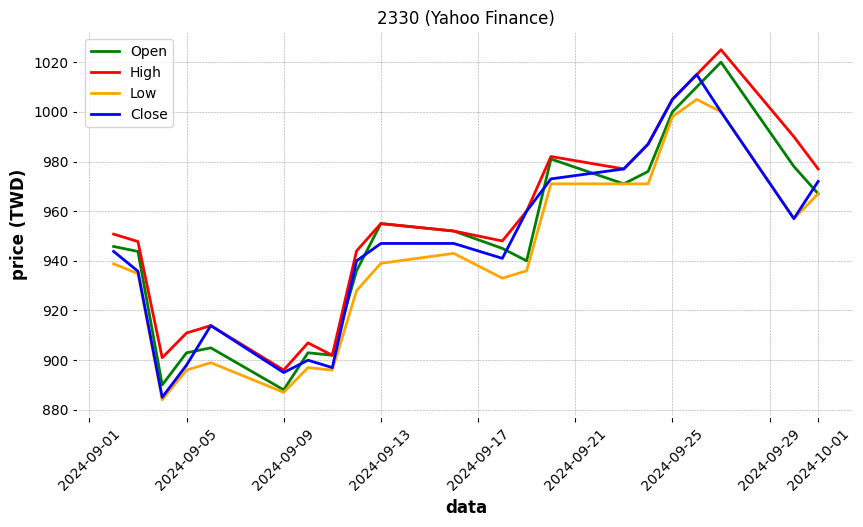

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

# 從 Yahoo Finance 抓取資料
def get_yahoo_data(stock_symbol: str, period='1mo'):
    stock = yf.Ticker(stock_symbol)
    df = stock.history(period=period)

    # 只取需要的欄位：開盤價、最高價、最低價、收盤價、成交量
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    return df

# 抓取台積電 (2330.TW) 一個月的股價數據
df_yahoo = get_yahoo_data('2330.TW', '1mo')

# 顯示 DataFrame 資料
print(df_yahoo)

# 繪製開盤價、最高價、最低價與收盤價的折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_yahoo.index, df_yahoo['Open'], label='Open', color='green')
plt.plot(df_yahoo.index, df_yahoo['High'], label='High', color='red')
plt.plot(df_yahoo.index, df_yahoo['Low'], label='Low', color='orange')
plt.plot(df_yahoo.index, df_yahoo['Close'], label='Close', color='blue')

plt.title('2330 (Yahoo Finance)')
plt.xlabel('data')
plt.ylabel('price (TWD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

(10/3) HW2

計算技術指標 (SMA, RSI, MACD)

In [21]:
import pandas as pd
import numpy as np

# 計算技術指標
def calculate_technical_indicators(df):
    # 計算SMA (10 天移動平均)
    df['SMA_10'] = df['Close'].rolling(window=10).mean()

    # 計算RSI
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # 計算MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

df_with_indicators = calculate_technical_indicators(df_yahoo)
print(df_with_indicators.tail())

                             Open    High     Low   Close    Volume  SMA_10  \
Date                                                                          
2024-09-25 00:00:00+08:00  1000.0  1005.0   998.0  1005.0  39405222   957.4   
2024-09-26 00:00:00+08:00  1010.0  1015.0  1005.0  1015.0  38321585   969.2   
2024-09-27 00:00:00+08:00  1020.0  1025.0  1000.0  1000.0  35783779   975.2   
2024-09-30 00:00:00+08:00   978.0   990.0   957.0   957.0  61603217   976.2   
2024-10-01 00:00:00+08:00   967.0   977.0   967.0   972.0  26760355   978.7   

                                 RSI       MACD  Signal_Line  
Date                                                          
2024-09-25 00:00:00+08:00  84.123995  12.615340     3.272424  
2024-09-26 00:00:00+08:00  83.853689  16.065989     5.831137  
2024-09-27 00:00:00+08:00  75.039408  17.389820     8.142874  
2024-09-30 00:00:00+08:00  65.816940  14.798635     9.474026  
2024-10-01 00:00:00+08:00  67.480107  13.796440    10.338509  


可視化 K 線圖


In [22]:
pip install mplfinance

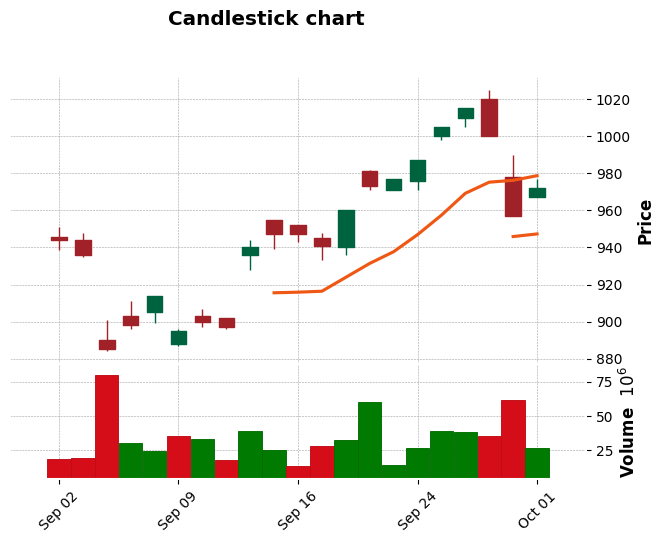

In [23]:
import mplfinance as mpf

# 可視化 K 線圖，結合 SMA
df_yahoo.index = pd.to_datetime(df_yahoo.index)  # 確保日期格式正確

# 增加技術指標(SMA)到圖表中
mpf.plot(df_yahoo, type='candle', style='charles',
         title='Candlestick chart',
         mav=(10, 20),  # 繪製10天和20天的SMA
         volume=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 創建漲跌標籤：如果下一天的收盤價高於當天，標記為1，否則為0
df_with_indicators['Target'] = np.where(df_with_indicators['Close'].shift(-1) > df_with_indicators['Close'], 1, 0)

# 刪除 NaN 值
df_with_indicators.dropna(inplace=True)

# 使用技術指標作為特徵
X = df_with_indicators[['SMA_10', 'RSI', 'MACD', 'Signal_Line']]
y = df_with_indicators['Target']

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 線性回歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_predictions = np.where(lr_predictions > 0.5, 1, 0)
print('線性回歸準確度:', accuracy_score(y_test, lr_predictions))

# 決策樹模型
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print('決策樹準確度:', accuracy_score(y_test, dt_predictions))

# 隨機森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print('隨機森林準確度:', accuracy_score(y_test, rf_predictions))

線性回歸準確度: 0.5
決策樹準確度: 0.5
隨機森林準確度: 0.5
